In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("MallCustomers.csv")

In [4]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


AttributeError: Rectangle.set() got an unexpected keyword argument 'scale'

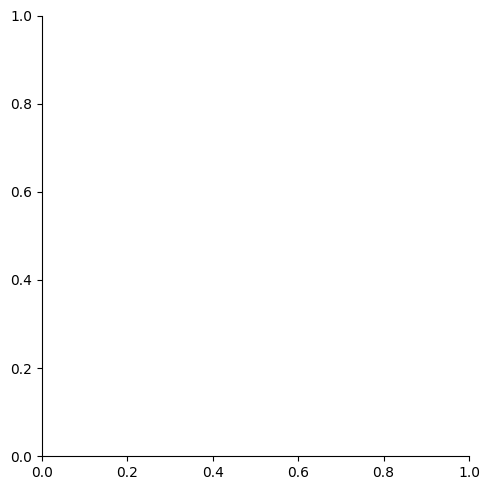

In [47]:
sns.displot(df["Age"],kind='hist',kde=True,bins=15,scale=
            )

C:\Users\Dell\AppData\Local\Temp\ipykernel_23156\3735993887.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])


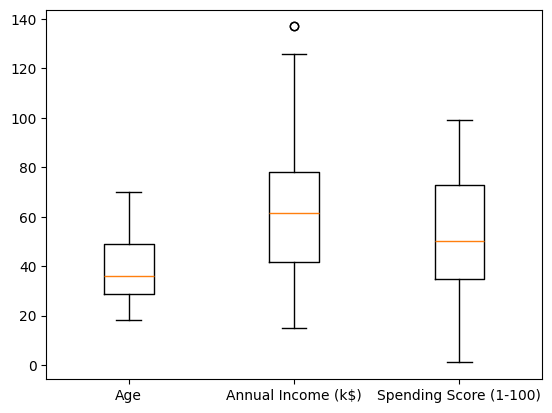

In [46]:
# Data for box plot
data = [df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)']]

# Create box plot
plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])
plt.show()

In [45]:
(max(df["Annual Income (k$)"])-df["Annual Income (k$)"].mean())/df["Annual Income (k$)"].std(ddof=1)

np.float64(2.9103678473873713)

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

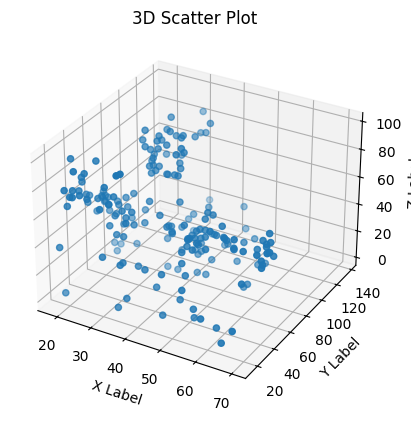

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)'])

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

In [65]:
scaled=df[["Age","Annual Income (k$)",'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled)

In [66]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

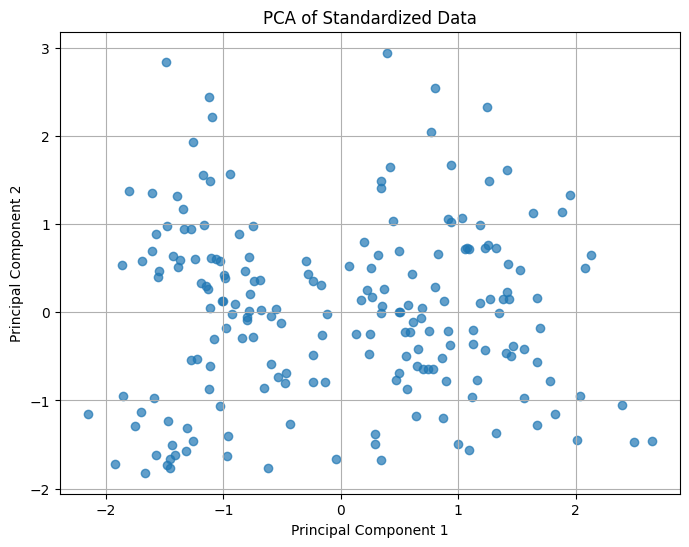

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()